In [1]:
# import packages, set paths and create file lists

import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
import tifffile
import numpy as np
import os, glob

import pandas as pd

import matplotlib.patches as patches
%matplotlib inline


localroot = os.path.expanduser('~')

#citizen_science = os.path.join(localroot, '_FrancisCrickProject/CitizenScience/ROI_1656-6756-329')
manual = os.path.join(localroot, '_FrancisCrickProject/ROI_1656-6756-329_manual/')
microscopy = os.path.join(localroot, '_FrancisCrickProject/ROI_1656-6756-329/')

annotations = glob.glob(manual + '*.tif')
images = glob.glob(microscopy + '*.tif')

cnt_fnames = os.listdir(manual)
img_fnames = os.listdir(microscopy)

img_cont_pairs  = []

# create image-contour pairs
for i in img_fnames:
    cont = [c for c in cnt_fnames if c[: c.index('.')] == i[:c.index('.')]]
    if len(cont) == 1:    
        img_cont_pairs.append((os.path.join(microscopy, i), \
                               os.path.join(manual, cont[0])))
    else:
        print (len(cont), 'found for image ', i, ' Check.')


print 'found ', len(img_cont_pairs), ' image/contour pairs'

found  300  image/contour pairs


In [37]:
from skimage.filters import gabor


image = tifffile.imread(img_cont_pairs[50][0])

filt_real, filt_imag = gabor(image, frequency=0.03)


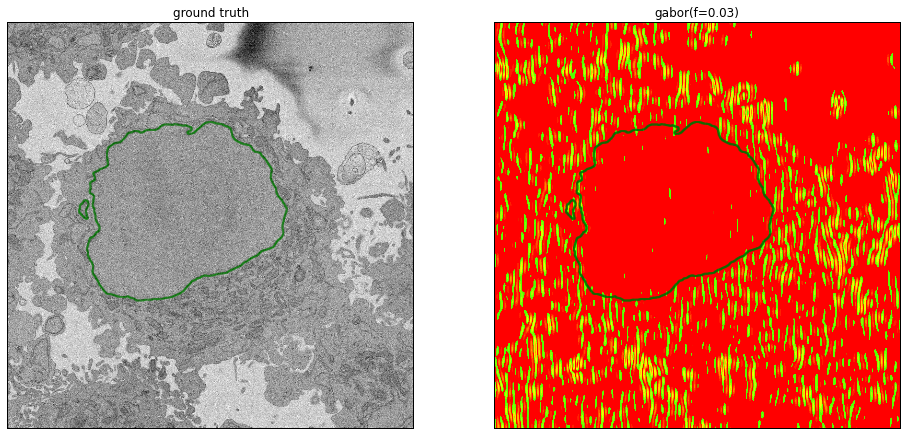

In [85]:
#plt.figure(figsize=(12, 5))            
#filt = gaussian(filt_real, sigma=5)
cnt = tifffile.imread(img_cont_pairs[50][1])

cpoints = np.nonzero(cnt > 1)

#plt.imshow(filt_real, cmap='prism') 
f, axarr = plt.subplots(1, 2, figsize=(16,8))
axarr = axarr.flatten()
# plot contour first, otherwise image is shifted afterwards
axarr[1].plot(cpoints[1], cpoints[0], 'g.', markersize=0.2, linewidth = 1)
axarr[1].imshow(filt_real, cmap = 'prism')
axarr[1].set_title('gabor(f=0.03)')

'''
#axarr[2].plot(cpoints[1], cpoints[0], 'yo', markersize=0.5, linewidth = 1)
filt_real2, _ = gabor(filt_real, frequency=10000)
axarr[2].plot(cpoints[1], cpoints[0], 'g.', markersize=0.2, linewidth = 1, alpha=0.5)
axarr[2].imshow(filt_real2, cmap = 'prism')
axarr[2].set_title('gabor(gabor(f=0.03), f=10000)') 
'''

axarr[0].plot(cpoints[1], cpoints[0], 'g.', markersize=0.2, linewidth = 0.1, alpha=0.5)
axarr[0].imshow(image, cmap = 'gray')
axarr[0].set_title('ground truth')

for a in axarr:
    a.set_xticks([])
    a.set_yticks([])

#f.suptitle('gabor filtering, f = 0.03', fontsize=14)
plt.show()
f.savefig('/home/marina/_FrancisCrickProject/features/gabor_3e-02.png', dpi=100, bbox_inches='tight')